#**Introduction**

This analysis examines the mental health of university students, checking to see if a few factors like anxiety, their chosen course of study, gender, age etc effect their mental state thereby causing them to be depressed. The data set was downloaded from kaggle and a link to the site and dataset has been provided. https://www.kaggle.com/code/shariful07/student-mental-health-data-analysis/data 

Two machine learning models will be used to carryout this research; 

1: Logistic regression, 

2: Random forest, 



## **Importing Some Required Libraries**

The major libraries needed for this model are imported in this subsection. Some of which include LogisticRegression, a type of statistical analysis used to model the probability of a certain event occurring based on one or more predictor variables. It is a binary classification algorithm, meaning it is used to predict the likelihood of an outcome being one of two possible values (such as "yes" or "no", "true" or "false", "success" or "failure", etc.).

StandardScaler transforms the data such that the mean of each feature is zero and the variance is one.

Finally, I also downloaded common python libraries for data manipulation such as pandas and numpy.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing
%matplotlib inline

# **Loading the Data**

In this section, the dataset which is a Comma seperated variable file (csv) was read and loaded, to be viewed as a pandas document.

Using the .head and .tail functions, the first 5 and last 5 rows of the dataset was viewed to see if the values of the uploaded dataset tallies with the downloaded document.

Finally, Other methods like .shape, .info, .nunique and .descirbe were also applied.

In [ ]:
#load the dataset

m_health = pd.read_csv('/content/Student Mental health.csv')

In [ ]:
#this function calls out the first 5 rows in the dataset

m_health.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
#the function calls out the last 5 rows of the dataset

m_health.tail()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No
100,18/07/2020 20:16:21,Male,20.0,Biomedical science,Year 2,3.00 - 3.49,No,No,No,No,No


In [ ]:
#the .shape function shows the total number of rows and columns

m_health.shape

(101, 11)

In [ ]:
#this function counts the number of rows

len(m_health)

101

In [ ]:
#this function counts the number of unique values

m_health.nunique()

Timestamp                                       92
Choose your gender                               2
Age                                              7
What is your course?                            49
Your current year of Study                       7
What is your CGPA?                               6
Marital status                                   2
Do you have Depression?                          2
Do you have Anxiety?                             2
Do you have Panic attack?                        2
Did you seek any specialist for a treatment?     2
dtype: int64

In [ ]:
#this function calls out the information of the dataset 

m_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [ ]:
#this function describes the statistical values of the dataset

m_health.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


# **Data Cleaning**
The main objective of this step is to clean the uploaded data.

Here, the columns were renamed, missing values were replaced with the mean of the values in the affected column, duplicate values were cleaned, the Year column (year 1 = Year 1 etc) was correctly formatted and the irrelevant columns were dropped.


In [ ]:
#renaming the columns

m_health.rename(columns = {'Choose your gender' : 'Gender',
                          'What is your course?' : 'Course',
                          'Your current year of Study': 'Year',
                          'What is your CGPA?' : 'CGPA',
                          'Do you have Depression?' : 'Depression',
                          'Do you have Anxiety?' : 'Anxiety',
                          'Do you have Panic attack?':'Panic Attack',
                          'Did you seek any specialist for a treatment?' : 'Seeking Treatment?'}, inplace = True)

In [ ]:
#dropping the column that isnt relevant to this report

m_health.drop(columns= 'Timestamp', axis= 1, inplace = True)

In [ ]:
'''this function calls out the column heads to see that the 
change has been effected.
'''

m_health.columns

Index(['Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital status',
       'Depression', 'Anxiety', 'Panic Attack', 'Seeking Treatment?'],
      dtype='object')

In [ ]:
#checking the first 5 rows after dropping the irrelevant columns and renaming the column heads

m_health.head()

,Gender,Age,Course,Year,CGPA,Marital status,Depression,Anxiety,Panic Attack,Seeking Treatment?
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


# **Data Exploration**

The isnull() function returns a Series of Boolean values, where True represents a null or missing value and False represents a non-null value.

The sum() function is then used to count the number of True values returned by isnull(), which corresponds to the number of null or missing values in the DataFrame or Series.

Therefore, isnull().sum() returns a Series containing the count of null values for each column in the DataFrame which were rplaced with the .fillna method.

The LabelEncoder function was also used to assign a unique integer value to each unique categorical variable by transforming non-numerical labels (as strings) into numerical labels (as integers).



In [ ]:
#checking for missing values

m_health.isnull().sum()

Gender                0
Age                   1
Course                0
Year                  0
CGPA                  0
Marital status        0
Depression            0
Anxiety               0
Panic Attack          0
Seeking Treatment?    0
dtype: int64

In [ ]:
#replacing missing values with the mean

m_health['Age'].fillna(m_health['Age'].mean(),inplace = True)

In [ ]:
m_health.isnull().sum()

Gender                0
Age                   0
Course                0
Year                  0
CGPA                  0
Marital status        0
Depression            0
Anxiety               0
Panic Attack          0
Seeking Treatment?    0
dtype: int64

In [ ]:
#exploring the course column

m_health['Course'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [ ]:
#replacing duplicate values 

m_health['Course'].replace({'engin': 'Engineering' , 'Engine':'Engineering' ,
                            'Islamic education':'Islamic Education' , 'Pendidikan islam':'Pendidikan Islam' ,
                            'BIT':'IT', 'psychology':'Psychology', 'koe': 'Koe', 'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs',
                            'Benl': 'BENL', 'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law'} , inplace = True)


In [ ]:
#number of unique values in the feature

len(m_health['Course'].unique())

37

In [ ]:
#changing the year to numeric form

m_health['Year'] = m_health['Year'].str.lower()
m_health['Year'] = m_health['Year'].str.strip('year')
m_health['Year'].astype(int)

0      1
1      2
2      1
3      3
4      4
      ..
96     1
97     2
98     3
99     4
100    2
Name: Year, Length: 101, dtype: int64

In [ ]:
#transforming all the values to integers using Labelencoder

from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

m_health['Gender'] = Le.fit_transform(m_health['Gender'])
m_health['Marital status'] = Le.fit_transform(m_health['Marital status'])
m_health['Depression'] = Le.fit_transform(m_health['Depression'])
m_health['Anxiety'] = Le.fit_transform(m_health['Anxiety'])
m_health['Panic Attack'] = Le.fit_transform(m_health['Panic Attack'])
m_health['Seeking Treatment?'] = Le.fit_transform(m_health['Seeking Treatment?'])
m_health['CGPA'] = Le.fit_transform(m_health['CGPA'])
m_health['Age'] = Le.fit_transform(m_health['Age'])

m_health.head()

,Gender,Age,Course,Year,CGPA,Marital status,Depression,Anxiety,Panic Attack,Seeking Treatment?
0,0,0,Engineering,1,3,0,1,0,1,0
1,1,4,Islamic Education,2,3,0,0,1,0,0
2,1,1,IT,1,3,0,1,1,1,0
3,0,5,Law,3,3,1,1,0,0,0
4,1,6,Mathemathics,4,3,0,0,0,0,0


In [ ]:
m_health.tail()

,Gender,Age,Course,Year,CGPA,Marital status,Depression,Anxiety,Panic Attack,Seeking Treatment?
96,0,4,BCS,1,4,0,0,1,0,0
97,1,0,Engineering,2,3,0,1,1,0,0
98,0,1,Nursing,3,4,1,1,0,1,0
99,0,6,Pendidikan Islam,4,4,0,0,0,0,0
100,1,2,Biomedical science,2,3,0,0,0,0,0


# **Data Visualization**

Data visualisation is the depiction of information and data in a graphical or visual style to facilitate communication and understanding of complicated information and patterns.

It improves our ability to explore and comprehend data as well as convey findings to others.



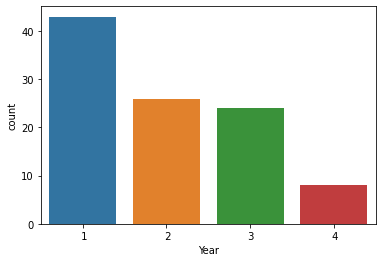

In [ ]:
#ploting the year column to see present values

sns.countplot(x = 'Year', data = m_health)
plt.show()

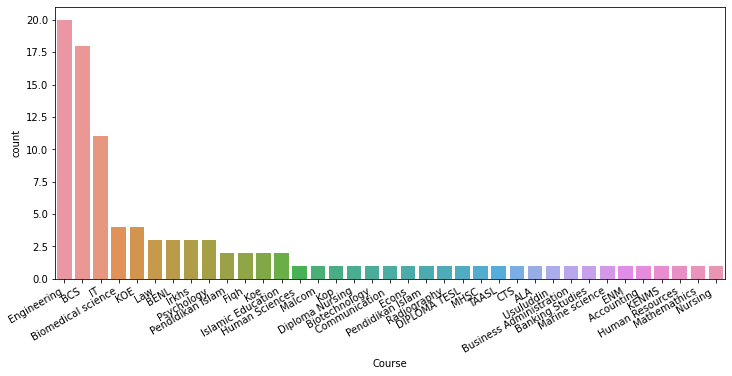

In [ ]:
#subplot gragh showing the values of the courses studied by the students

fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x = m_health['Course'], order = m_health['Course'].value_counts(normalize = True).index)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

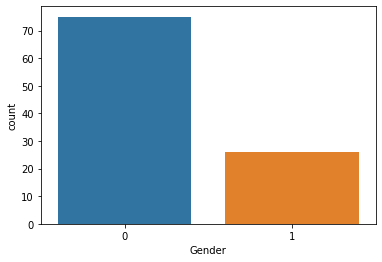

In [ ]:
#Checking the dataset for the gender representation

sns.countplot(x='Gender', data = m_health)
plt.show()

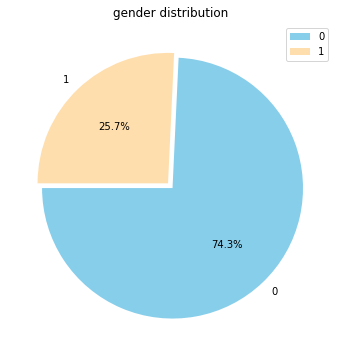

In [ ]:
#pie chart showing the distribution of students by gender and percentage.

plt.figure(figsize=(9,6))
plt.title("gender distribution")
g = plt.pie(m_health.Gender.value_counts(), explode=(0.025,0.025), labels=m_health.Gender.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

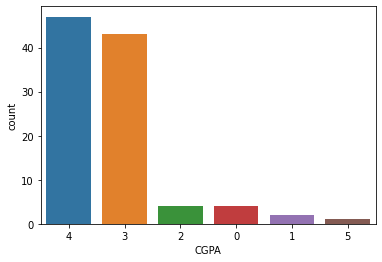

In [ ]:
sns.countplot(x= m_health['CGPA'], order = m_health['CGPA'].value_counts(normalize=True).index)
plt.show()

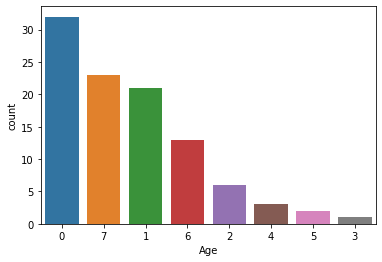

In [ ]:
sns.countplot(x = m_health['Age'], order = m_health['Age'].value_counts(normalize = True).index)
plt.show()

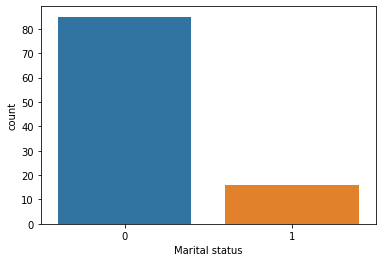

In [ ]:
sns.countplot(x= 'Marital status', data = m_health)
plt.show()

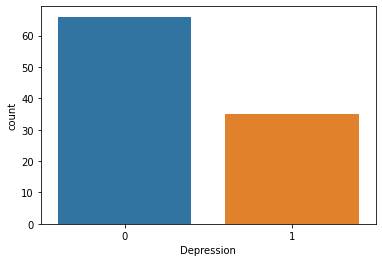

In [ ]:
sns.countplot(x = m_health['Depression'], order = m_health['Depression'].value_counts(normalize = True).index)
plt.show()

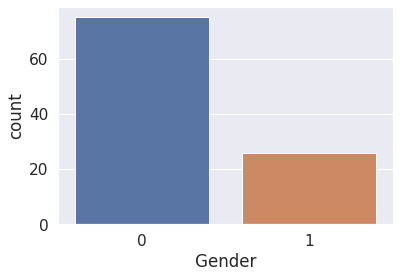

In [ ]:
sns.countplot(x = m_health['Gender'], order = m_health['Depression'].value_counts(normalize = True).index)
plt.show()

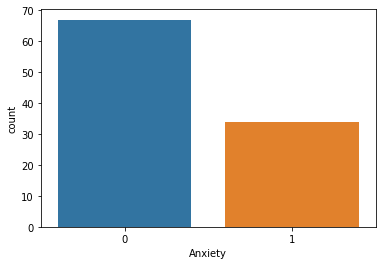

In [ ]:
sns.countplot(x= m_health['Anxiety'], order = m_health['Anxiety'].value_counts(normalize=True).index)
plt.show()

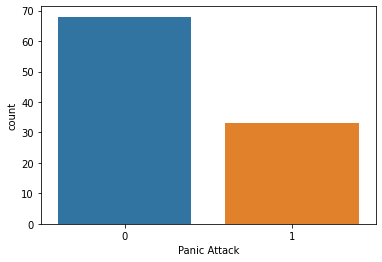

In [ ]:
sns.countplot(x = m_health['Panic Attack'], order = m_health['Panic Attack'].value_counts(normalize = True).index)
plt.show()

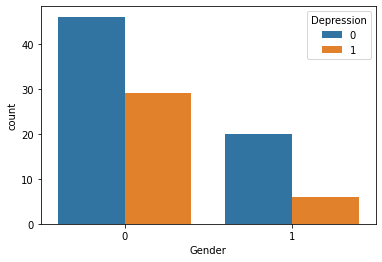

In [ ]:
sns.countplot(x = m_health['Gender'], hue = m_health['Depression'], order = m_health['Gender'].value_counts(normalize=True).index)
plt.show()

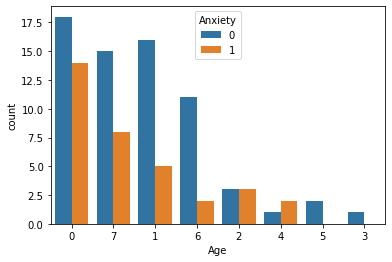

In [ ]:
sns.countplot(x = m_health['Age'], hue = m_health['Anxiety'], order = m_health['Age'].value_counts(normalize=True).index)
plt.show()

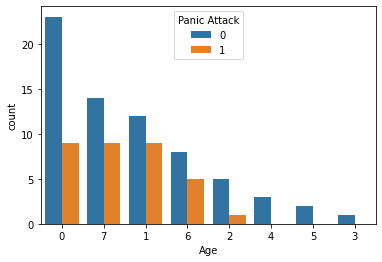

In [ ]:
sns.countplot(x = m_health['Age'], hue = m_health['Panic Attack'], order = m_health['Age'].value_counts(normalize=True).index)
plt.show()

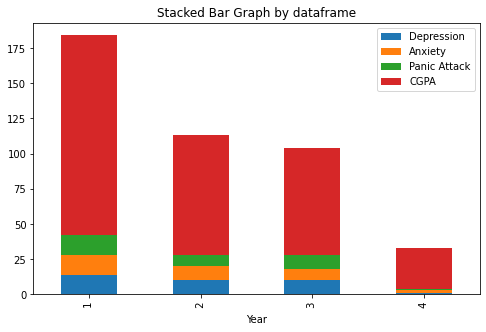

In [ ]:
#stacked bar graph showing the relationship  between the year of study and other major fields

data = m_health[['Year','Depression','Anxiety','Panic Attack', 'CGPA']]
data = data.groupby('Year').sum().reset_index()
data.plot(x='Year', kind='bar', stacked=True, title='Stacked Bar Graph by dataframe',figsize=(8,5))

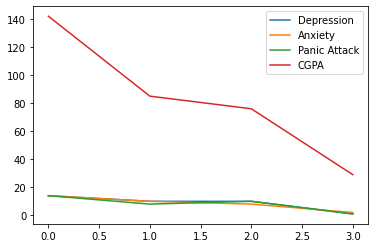

In [ ]:
data.plot()

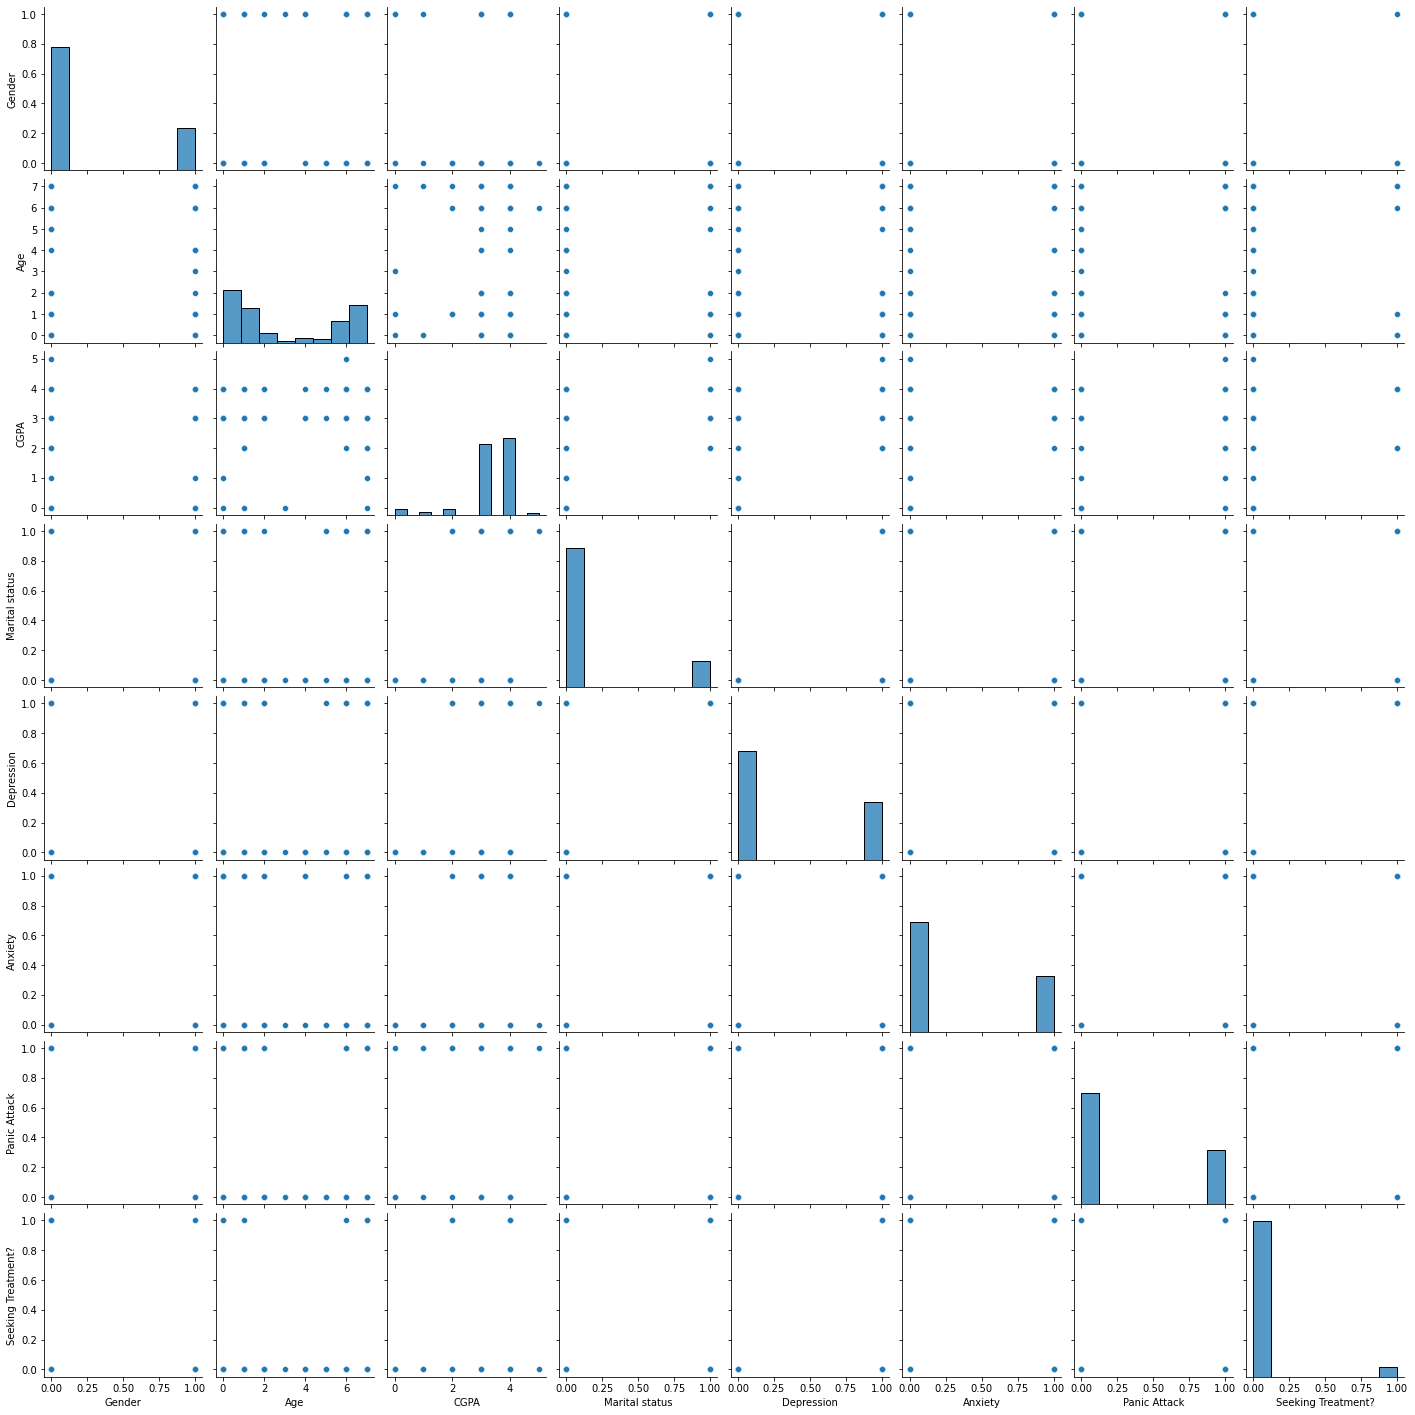

In [ ]:
sns.pairplot(m_health)

In [ ]:
#checking the carrelation of values

m_health.corr()

,Gender,Age,CGPA,Marital status,Depression,Anxiety,Panic Attack,Seeking Treatment?
Gender,1.000000,0.004193,-0.154524,-0.069389,-0.143235,0.059783,-0.023902,-0.052168
Age,0.004193,1.000000,0.016780,0.100962,-0.077258,-0.092469,0.049959,0.047801
CGPA,-0.154524,0.016780,1.000000,0.040236,0.020872,0.160044,0.056251,0.012255
Marital status,-0.069389,0.100962,0.040236,1.000000,0.595784,0.092606,0.275909,0.349819
Depression,-0.143235,-0.077258,0.020872,0.595784,1.000000,0.273764,0.246842,0.345105
Anxiety,0.059783,-0.092469,0.160044,0.092606,0.273764,1.000000,0.084478,0.086880
Panic Attack,-0.023902,0.049959,0.056251,0.275909,0.246842,0.084478,1.000000,0.182145
Seeking Treatment?,-0.052168,0.047801,0.012255,0.349819,0.345105,0.086880,0.182145,1.000000


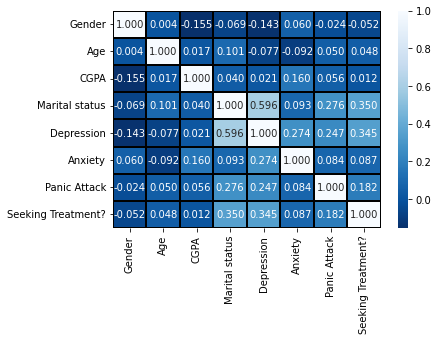

In [ ]:
#plotting the correlation with a heatmap

sns.heatmap(m_health.corr(), annot=True, cmap='Blues_r', linewidth=1, linecolor='black', fmt='.3f')

# **Experiment** 

**(Depression)**


### **Feature Selection**

Here, the X and Y variables were identified and seperated. Our target variable being the 'Depressiion' column was split from the rest of the columns.

In [ ]:
Feature = ['Year', 'CGPA', 'Marital status', 'Anxiety', 'Panic Attack', 'Seeking Treatment?']
X = m_health[Feature]
y = m_health.Depression


### **Data Splitting**

In [ ]:
#splitting the data to train 70% and test 30%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=115)


In [ ]:
 #exploring the y column of the training set
 
y_train.value_counts()

0    46
1    24
Name: Depression, dtype: int64

In [ ]:
#balancing the training set into individual indexes

pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
  higher = pos_index
  lower = neg_index
else:
  lower = pos_index
  higher = neg_index

In [ ]:
#importing random for random selection
import random

random.seed(0)
higher = np.random.choice(higher, size = len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

In [ ]:
#subsetting the training set by selected values

X_train = X_train.loc[new_indexes, ]
y_train = y_train.loc[new_indexes]

### **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))
X_train2.columns = X_train.columns.values
X_test.columns = X_test.columns.values
X_train.index = X_train.index.values
X_test.index = X_test.index.values
X_train = X_train2
X_test = X_test2


### **Model Building**

# **Logistic Regression**

A logistic function, also referred to as a sigmoid function, is used in logistic regression to represent the connection between the predictor variables and the binary outcome variable, resulting in an S-shaped curve. Any real-valued input is translated by this function into a value between 0 and 1, which represents the likelihood that the result variable will have the value 1. (or "success").

In many disciplines, including machine learning, statistics, logistic regression is often employed. When dealing with binary outcomes, such as whether or not a patient will contract an illness, it is especially helpful.

In [ ]:
#fitting the model to training set with logistics regression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
#Evaluating the test results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.7096774193548387

In [ ]:
precision_score(y_test, y_pred)

0.5833333333333334

In [ ]:
recall_score(y_test, y_pred)

0.6363636363636364

In [ ]:
f1_score(y_test, y_pred)

0.6086956521739131

Test Data Accuracy: 0.7097


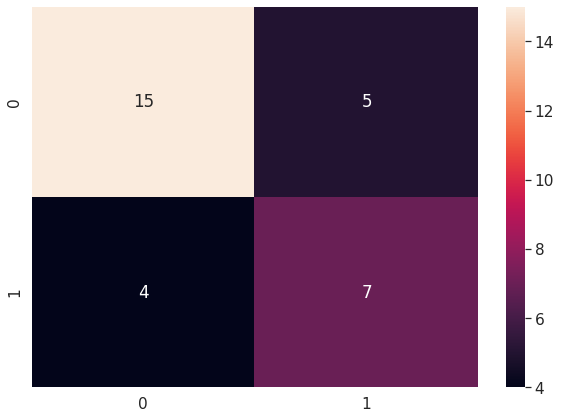

In [ ]:
m_health_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.set(font_scale = 1.4)
sns.heatmap(m_health_cm, annot = True, fmt='g')
print('Test Data Accuracy: %0.4f' %accuracy_score(y_test, y_pred))

#**Model Report**

The logistic regression model applied to the given dataset achieved an accuracy of 0.7097, which indicates that 70.97% of the model's predictions were correct. The precision of the model is 0.5833, suggesting that when the model predicted a positive result, it was accurate 58.33% of the time. 

The recall of the model is 0.6364, meaning that it correctly identified 63.64% of the positive instances in the dataset. The f1 score of the model is 0.6087, which provides a measure of the model's overall performance, balancing both precision and recall. 

The f1 score of 0.6087 indicates that the model performed reasonably well, but there is room for improvement and further analysis and model tuning may be necessary to increase the model's predictive power.

# **Random Forest**

A machine learning technique called Random Forest is used for classification, regression, and other tasks. It is an ensemble learning technique that builds numerous decision trees and aggregates their forecasts to increase the model's robustness and accuracy.

A large number of decision trees are generated using various subsets of the training data and a random subset of characteristics during the training phase of the random forest technique. The random forest algorithm aggregates all of the trees' predictions throughout prediction to produce the final forecast.

When compared to other machine learning methods, Random Forest provides a number of benefits. For instance, it is capable of handling a high number of input variables and identifying variable interactions. Also, it is less prone to overfitting, which happens when a model becomes overly complicated and starts to recognise patterns in the data's noise rather than their true underlying patterns.

In [ ]:
#fitting the model to training set with logistics regression

Feature_rf = ['Year', 'CGPA', 'Marital status', 'Anxiety', 'Panic Attack', 'Seeking Treatment?']
Xs = m_health[Feature_rf]
ys = m_health.Depression

In [ ]:
#splitting the data to train 70% and test 30%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.3,random_state=115)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier= RandomForestClassifier()
rf_classifier.fit(Xs, ys)

#Testing the Model on test set

ys_pred_rf=rf_classifier.predict(Xs)


In [ ]:
ys_pred_rf

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
#Evaluating the test results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

cm = confusion_matrix(ys, ys_pred_rf)
accuracy_score(ys, ys_pred_rf)

0.8712871287128713

In [ ]:
precision_score(ys, ys_pred_rf)

0.9583333333333334

In [ ]:
recall_score(ys, ys_pred_rf)

0.6571428571428571

In [ ]:
f1_score(ys, ys_pred_rf)

0.7796610169491525

Test Data Accuracy: 0.8713


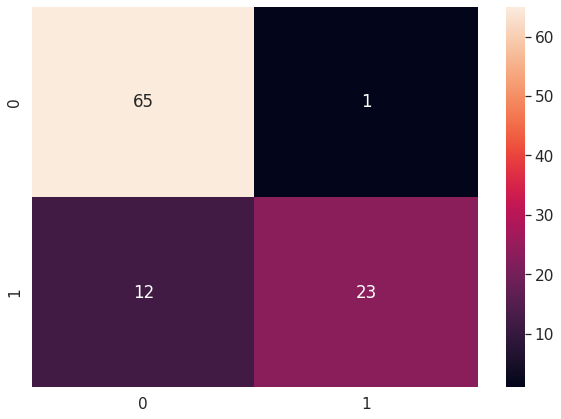

In [ ]:
m_health_cm = pd.DataFrame (cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.set(font_scale = 1.4)
sns.heatmap(m_health_cm, annot = True, fmt='g')
print('Test Data Accuracy: %0.4f' %accuracy_score(ys, ys_pred_rf))

#**Model Report**


Based on the analysis of the dataset using a random forest model, we achieved an accuracy of 87%, indicating that 87% of the predictions made by the model were correct.

The precision score of 95% suggests that among all the positive predictions made by the model, 95% of them were correct.

However, the recall score of 65% implies that the model only identified 65% of all positive samples correctly.

The F1-score of 77% is a harmonic mean of precision and recall, indicating that there is a balance between the two metrics.

Overall, the random forest model performed well in terms of accuracy and precision, but its recall score is relatively low, indicating that it may struggle to identify all positive samples in the dataset. Therefore, further analysis and optimization of the model may be necessary to improve its performance on this dataset.


#**Conclusion**

In conclusion, the student mental health dataset, with depression as the goal column, offers important information about the causes of depression in students. Students' depression is significantly predicted by a number of factors, according to the study of the dataset using the random forest model. 


The robust machine learning technique known as the random forest model successfully captures the intricate correlations between the predictor variables and the target variable. High accuracy and precision ratings for the model show that it is capable of correctly predicting whether or not students would experience depression. The model did a good job at identifying students who are at a high risk of depression, but its relatively low recall score indicates that it may overlook some occurrences of depression.

Overall, the analysis's findings offer useful data that policymakers and mental health specialists may use to create successful interventions and plans for preventing and treating student melancholy. Action can be taken to improve students' mental health and wellbeing by addressing the risk factors found in the analysis, which will result in higher academic results and a more upbeat attitude on life.
